In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [37]:
df=pd.read_csv(r"C:\Users\amogh\Downloads\MY_DAILY_WORK INERNSHIP\TASK 1\TASK1\tested.csv")

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [45]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=df['Embarked'].fillna('S')
df['Embarked']=le.fit_transform(df['Embarked'])

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,NaN,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,NaN,0,0,8.0500,2


In [49]:
imputer=SimpleImputer(strategy='median')
df['Age']=imputer.fit_transform(df[['Age']])
df['Fare']=imputer.fit_transform(df[['Fare']])

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,27.0,0,0,8.0500,2


In [53]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [55]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [57]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
log_model=LogisticRegression(max_iter=200)
log_model.fit(train_x,train_y)

LogisticRegression(max_iter=200)

In [61]:
log_preds=log_model.predict(test_x)
accuracy_score(test_y,log_preds)
classification_report(test_y,log_preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       1.00      1.00      1.00        34\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

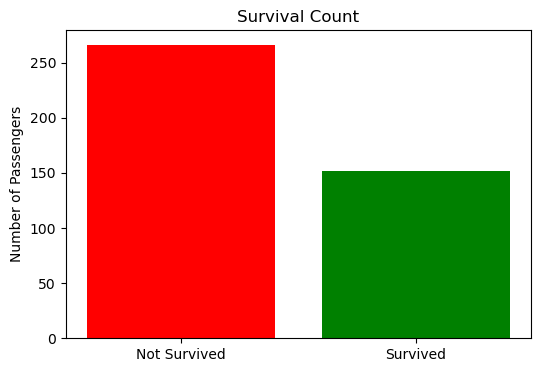

In [63]:
survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(['Not Survived', 'Survived'], survival_counts, color=['red', 'green'])
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
plt.show()
